##**Module 1 -- Introductory Notebook for the Brown University AI Winter Workshop 2025**

CFPU, Center for the Fundamental Physics of the Universe

> https://cfpu.brown.edu/

Deptartment of Physics, Brown University

> https://physics.brown.edu

2025 Winter School Indico

> https://indico.physics.brown.edu/event/34/


**If you choose to use any of the content within this notebook, please keep the above text with the material.**

**General Outline**

COPY THIS (AND ALL NOTEBOOKS) TO YOUR LOCAL DRIVE TO BEGIN WORK! YOUR FINAL RESULT SHOULD AUTOMATICALLY BE SAVED IN THE APPROPRIATE MODULE RESULTS FOLDER IN THE SHARED DRIVE!

READ ALL STEPS AND ENTIRE NOTEBOOK FIRST, BEFORE STARTING!
1.   import ML libraries (e.g. TensorFlow/Keras, Torch, etc)
2.   Mount the data drive and set appropriate paths for reading data and saving work
3.   Perform data preparation (if needed)
4.   Build and train a model
5.   Perform inference to obtain results
6.   Submit results to prepared Google Drive with a standardized filename

In [ ]:
# Set your name

first_name = 'FIRST'
last_name = 'LAST'
date = 'YYYYMMDD'

**1. Create a cell to import your preferred ML libraries, e.g. TensorFlow or PyTorch**

In [ ]:
# import relevant libraries, e.g. TF or Torch; comment or uncomment as needed
import tensorflow as tf
from tensorflow import keras

import torch

**2. Mount the Google shared drive to get data.**

In [ ]:
# Mount your drive - NOTE: There will be a window that will ask you to agree to access the account.  You must agree to this.
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**2a. Set the directories/paths for the Winter School modules.  This for things like data loading.  Different modules may do things slightly differently.  These are generally read-only.**

In [ ]:
import os

In [ ]:
# Set up top-level paths
top_level_path = '/content/drive/Shared drives/AI Winter School (Brown Physics CFPU 2025)/' # SET THIS

In [ ]:
# Check top level path to see the module folders shared with you.  Copy and paste the one you want to accessin the module_path variable below.
os.listdir(top_level_path)

['Module 1 -- Introductory Module',
 'README (Administration and Set Up Advice).gdoc',
 'Module 4 -- Self-Supervised Learning to Find Interacting and Starburst Galaxies',
 'Brown Physics CFPU AI Winter School 2025 - Panel and Opening Remarks (Gaitskell).gslides',
 'Module 2 -- Graph Neural Networks in Particle Physics',
 'Module 6 -- Auto-Encoders for Data Compression in Dark Matter Direct Detection Experiments',
 'Module 7 -- Generative AI with Industrial Applications ',
 'Module 3 -- Inverse Scattering (Application to Ground Penetrating Radar)',
 'Module 5 -- Large Language Models (LLMs) and Retrieval Augmented Generation (RAG)']

In [ ]:
# Set up the module-specific path
module_path = 'Module 1 -- Introductory Module/dataset.pkl'

In [ ]:
# Set the full path
full_path = top_level_path+module_path

**2b. Set the directories/paths for your local Google Drive (MyDrive).  This for saving work.  Since this is your drive, you have write access.**

In [ ]:
# Set your top-level local drive
local_drive = '/content/drive/MyDrive/'

In [ ]:
# Set your personal Winter School 2025 folder location
winter_school_drive = "AI Winter School - Personal (Brown Physics CFPU 2025)/"

In [ ]:
# Set the full, personal Winter School path
full_local_path = local_drive+winter_school_drive

In [ ]:
# List the sub-folders within it so you save the module data to the correct folder.  This allows you to more easily submit work later.
os.listdir(full_local_path)

['Module 1', 'Module 2']

In [ ]:
# Set your local save folder appropriate to your module based on the output of the previous cell
local_save_folder_path = full_local_path+'Module 1'

**3. Perofrm data preparation.  In this exmple, we will import the pandas library and read the data into a pandas dataframe.  We will then visualize the data and prepare it to be fed into a machine learning model.**

In [ ]:
import pandas as pd

# View the data as a pandas dataframe.
# Different modules may do this differently, with different libraries.

df = pd.read_pickle(full_path)
display(df)

,DSdata,UL_values,truth
199553,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 950.0, 7000.0, 0.5]",0
64603,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7000.0]",1
111353,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 100.0, 7000.0, 0.5]",0
62890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7000.0]",1
198876,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 950.0, 7000.0, 0.5]",0
...,...,...,...
93554,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7000.0]",1
129625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 250.0, 7000.0, 0.5]",0
51263,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 7000.0]",1
142430,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 400.0, 7000.0, 0.5]",0


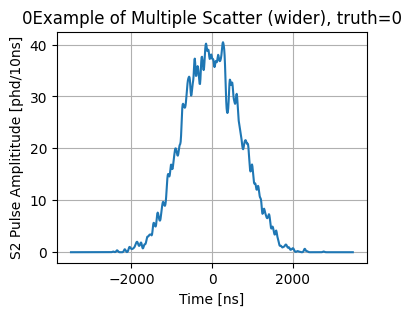

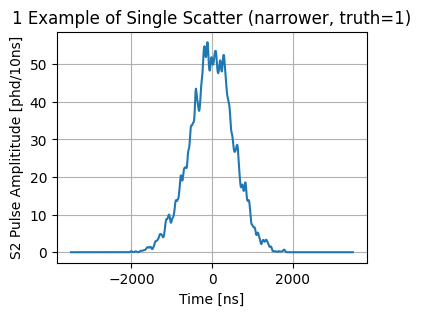

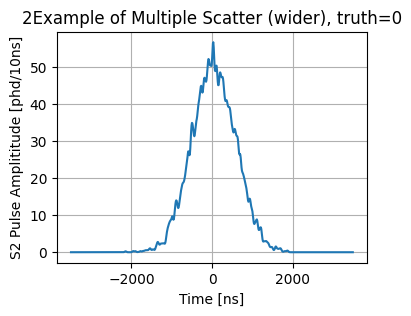

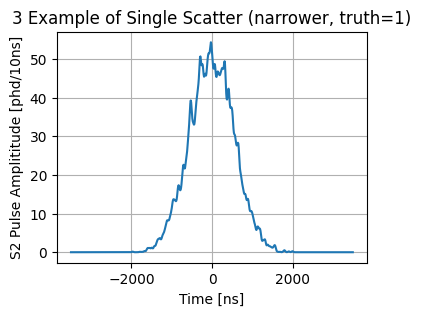

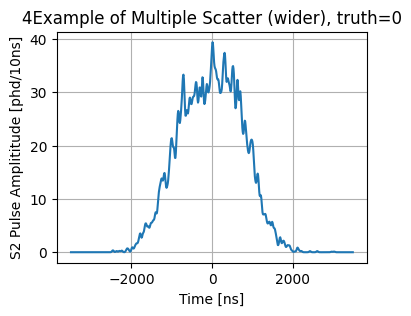

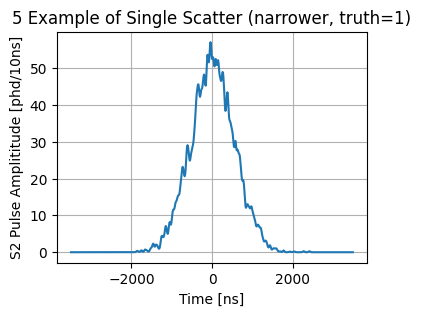

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Do any data processing or visualization to see what you're actually looking at
# Make an x label for the traces
nsamples = len( df['DSdata'][0] ) # length of pulse trace in time bins
timebase = 10. * ( np.arange(nsamples) - np.ceil(nsamples/2.) ) # 10 ns per sample, put 0 in middle of time trace (arbitrary)

# View a select set of pulses
for i in [0,1,2,3,4,5]: # List of pulse indices you are looking at
  # i = 0 # Index of pulse that we will show
  plt.figure(figsize=(4,3))
  plt.plot( timebase , df['DSdata'].iloc[i] , '-' )
  plt.grid(True)
  plt.xlabel( 'Time [ns]' )
  plt.ylabel( 'S2 Pulse Amplititude [phd/10ns]' )
  if df['truth'].iloc[i] == 1:
    plt.title(f'{i} Example of Single Scatter (narrower, truth=1)')
  else:
    plt.title(f'{i}Example of Multiple Scatter (wider), truth=0')

In [ ]:
N_events = 50000

# Shuffle data to reduce bias in the training and select the features
df_shuffled = df.sample(frac=1)[:N_events] # Select only N_events to make training fast.  Remove this or modify to use all or a different fraction of the data

training = df_shuffled['DSdata']
target = df_shuffled['truth']

In [ ]:
# Convert to NumPy arrays (sometimes easier to work with when using ML libraries)
X = np.array(training.values.tolist())
y = np.array(target.values.tolist())

In [ ]:
# Reshape
X = X.reshape(len(X), -1, 1)

In [ ]:
from sklearn.model_selection import train_test_split

# split to create training and test data; reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the training and label tensors
# X_train is the training set tensor with the 700-sample pulse data
# y_train is the target label tensor that has the True(1)/False(0) values; using this makes the model supervised learning

print(X_train.shape) # The shape here is (batch size/number of pulses, number of samples in the pulse, number of pulses in pulse array [1]).
print(y_train.shape) # The shape here is the same as the batch size as the number of labels corresponds to the number of pulses.

(40000, 700, 1)
(40000,)


**4. Build and train a model.**

### The Model

This is the heart of the exercise.  The `build_model_()` (you can call it whatever you want) function is what creates the neural network model.  Your task is to select the appropriate layers and hyperparameters.

You must select or tune

1. The number of layers (if any) [1] as well as the number of filters and their sizes.

For the dense layers you will need to choose

2. The number of hidden layers, `n_hidden`

3. The number of neurons per layer, `n_neurons`

You will further need to choose

4. The learning rate, `learning_rate`.  A reasonable starting value for this problem might be 1e-3.

5. The activation function
    * Check "Available activations" at [2]
    * Note: the $\textbf{activation function}$ for the last (dense) layer, i.e. the output layer with one neuron, should have a different activation function than the $\textbf{hidden layers}$ (layers with trainable parameters between the input and output layers).  It should be specific to $\textbf{binary classification}$.

6. The optimizer (below we default to $\textbf{stochastic gradient descent (SGD)}$, but do we stay with SGD or use something else?)
    * Check "Available Optimizers" at [3].

7. The loss function
    * You can select your loss function from [4].  Use the name of the given loss function when compiling your model.  Since this is a $\textit{binary}$ classification problem you may want to pay attention to the probabilistic losses.

The metric is not relevant for learning and is only used to monitor progress after each $\textbf{epoch}$ (one pass of the training data set).  You can chang the metric from "accuracy" to something closer to your evaluation metric (i.e. `ROC AUC`), to monitor your training progress.

Note that there are two different activation functions used: one for the hidden layers and one or the output layer.  Can you think why this is?  For $\textbf{binary classification}$, why might we use a $\textbf{sigmoid activation function}$ for the $\textit{output layer}$?

Also note the `input_shape` argument.  In this exercise, this corresponds to the length of a 1D feature vector.  So depending on how many features you use, the shape will change.

Finally, if you don't want to keep tweaking your model hyperparameters by hand and you are very ambitious, you can use the `GridSearchCV` [1] or `RandomizedSearchCV` [2] methods in scikit-learn.  These allow you to define a parameter space that your model will use to select parameters and evaluate itself with, finally giving you an optimized set.  `GridSearchCV` does not scale well with parameter space size and may take a long time to complete, as it searches the entire space.  `RandomizedSearchCV` will randomly search the parameter space and can thus be faster, however it still may take a while.  Keras provides something with a similar functionality, called `Keras Tuner` [3] .  All three of these require you to modify the code in this notebook in a non-trivial, as they are not implemented by default here.

You are not required to implement these parameter search methods but you should at least be aware of their existence.

[1] https://keras.io/api/layers/convolution_layers/convolution1d/

[2] https://keras.io/api/layers/activations/

[3] https://keras.io/api/optimizers/

[4] https://keras.io/api/losses/

[5] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

[7] https://keras.io/keras_tuner/

### A note on model building

We use the `Sequential` model here, where layers are stacked one top of each other, one after the other.  There is also a `functional` model that can also be used.  The advantage of this is its greater flexibility.  The `functional` API allows for more complex models that are not simply layers that are stacked linearly.

In [ ]:
# Model code here
# define neural network model
def build_model_cnn(n_hidden = 1, n_neurons = 1, activation='relu', learning_rate = 1e-3, input_shape=(700, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    model.add(keras.layers.Conv1D(filters=1, kernel_size=2, padding='same', activation=activation)) # To set the kernel size to e.g. 3, do kernel_size = 3
    model.add(keras.layers.Conv1D(filters=2, kernel_size=4, padding='same', activation=activation))

    model.add(keras.layers.Flatten())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation))

    # For binary classification, the last (dense) layer has one ouput neuron as we are trying to make a binary decision between one class or another.
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Stochastic Gradient Descent is chosen here but you may find other optimizers that are better.
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    # The loss functions affects the learning but the metric does not.  The metric is used only as a monitor of training progress.
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
def build_model_dense(learning_rate = 1e-3, input_shape=(700, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=input_shape))
    model.add(keras.layers.Flatten())
    initializer = tf.keras.initializers.HeNormal()
    model.add(keras.layers.Dense(700, kernel_initializer = initializer, activation='selu'))
    model.add(keras.layers.Dense(512, kernel_initializer = initializer, activation='selu'))
    model.add(keras.layers.Dense(128, kernel_initializer = initializer, activation='selu'))
    #model.add(keras.layers.Dense(64, kernel_initializer = initializer, activation='selu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer)

    return model

In [ ]:
# plot model
def model_describe_and_plot():
    model_to_plot = build_model_dense()

    model_to_plot.summary()
    keras.utils.plot_model(model_to_plot, local_save_folder_path+'/my_model.png', show_shapes=True)

In [ ]:
# Get a description of the model
model_describe_and_plot()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 700)                 │         490,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             701 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491,401 (1.87 MB)

 Trainable params: 491,401 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# create the model instance that will be used for training.
model = build_model_dense()

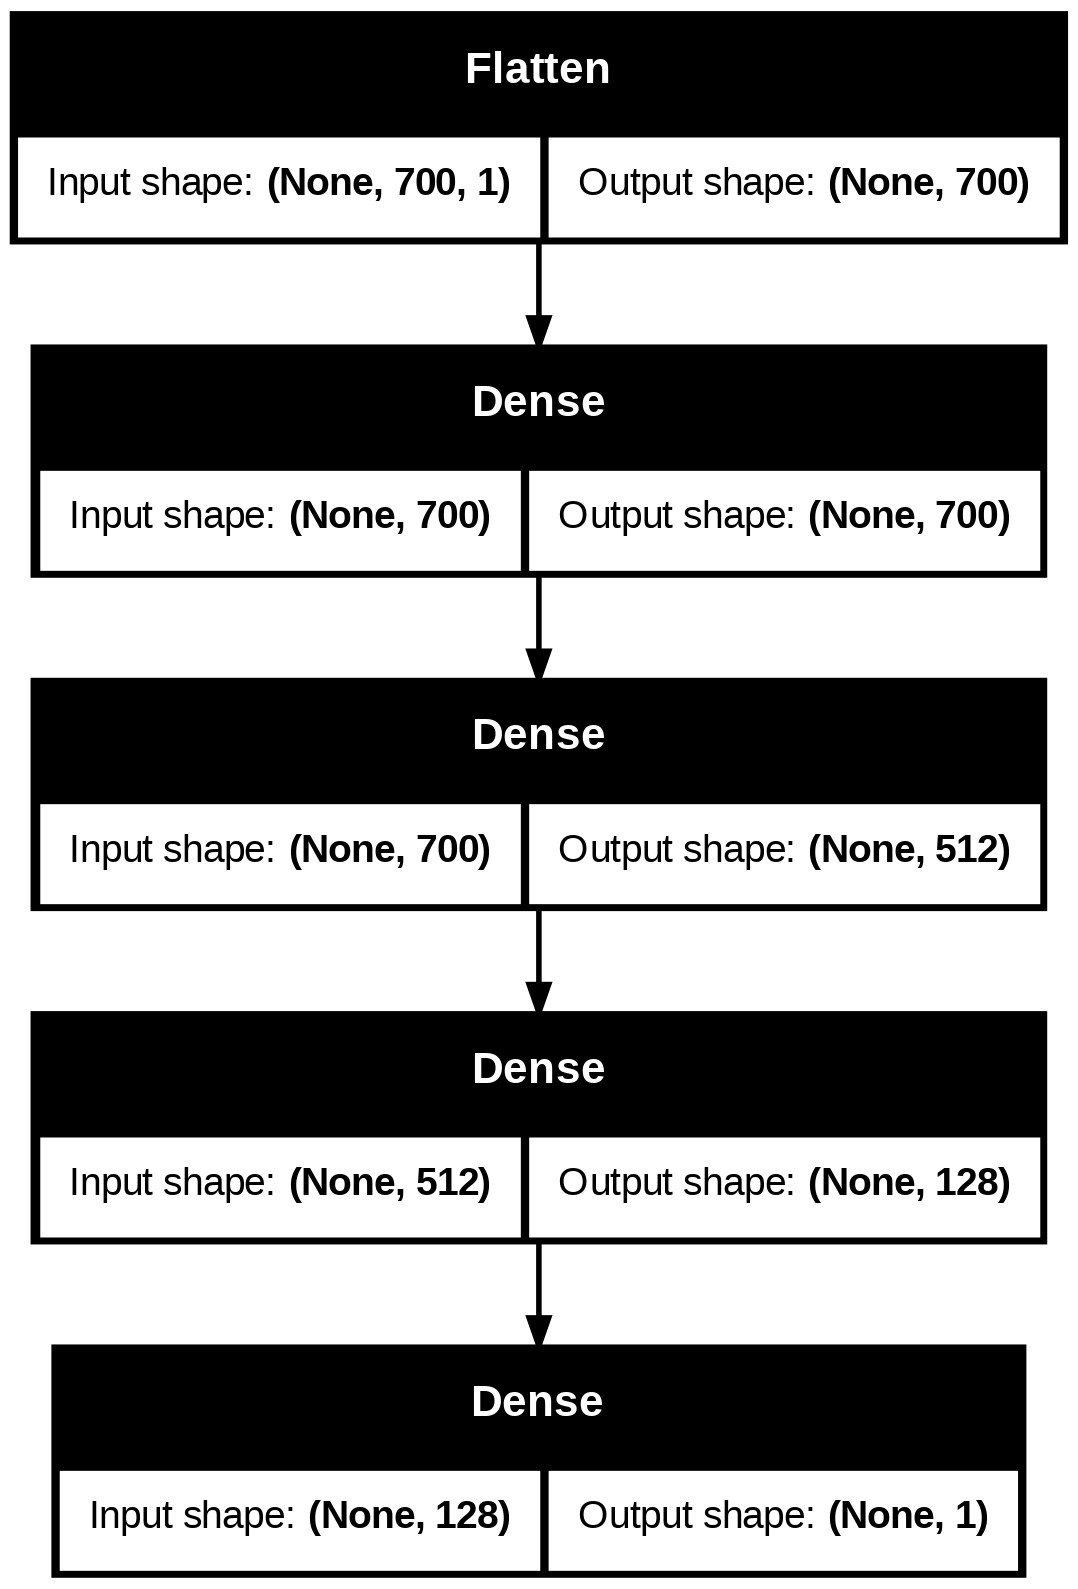

In [ ]:
# plot a graphical representation of the model
keras.utils.plot_model(model, local_save_folder_path+'/my_model_display.png', show_shapes=True)

### Training the model

Here is the step where we train the model.  There are a few things that need to be explained.  

There is the optional `validation_split` argument in the fit (train) function.  What this does is hold out a user-defined random portion of the training data at each epoch to perform a self-evaluation,  Monitoring the performance on the validation set, which does not affect the training, allows the user to check for things like $\textbf{overfitting}$, whereby the nerual network memorizes fetures of the training set but does not generalize well to data it has not seen.

There are a couple of things implemented below called "callbacks".  Callbacks allow you to control how the learning is performed.  There are two callbacks used here.

1. `ReduceLROnPlateau` is a callback that reduces the learning rate when the model training does not find an improvement in (this case) the validation loss after 5 epochs.  It reduces the learning rate by a factor of 0.2 down to a minimum of 0.00001.  This can help with problems like getting stuck in a local minimum.

2. `EarlyStopping` stops the training after a certain number of epochs that you set (`patience`).  This helps reduce the chance of overfitting.  A rule of thumb is to set the patience to 10\% the total number of epochs, though this really depends on you and your project.

Callbacks are optional and you can remove or alter them here as you like.

In [ ]:
# Model training, evaluation, and statistics here
#train and save model

# Set the callbacks (types of training conditions)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
#my_callbacks = [keras.callbacks.EarlyStopping(patience=5), reduce_lr]
my_callbacks = [keras.callbacks.EarlyStopping(patience=5)]

# Train the model with the fit function.  This can be up to 30s/epoch
training_history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, callbacks=[my_callbacks], verbose=2)
model.save(local_save_folder_path+'/introduction_exercise_exercise_winter_school_2025.keras')

Epoch 1/3
1000/1000 - 11s - 11ms/step - loss: 0.7981 - val_loss: 0.4133
Epoch 2/3
1000/1000 - 19s - 19ms/step - loss: 0.4139 - val_loss: 0.4605
Epoch 3/3
1000/1000 - 10s - 10ms/step - loss: 0.4054 - val_loss: 0.4011


**5. Perform inference and obtrain results.**

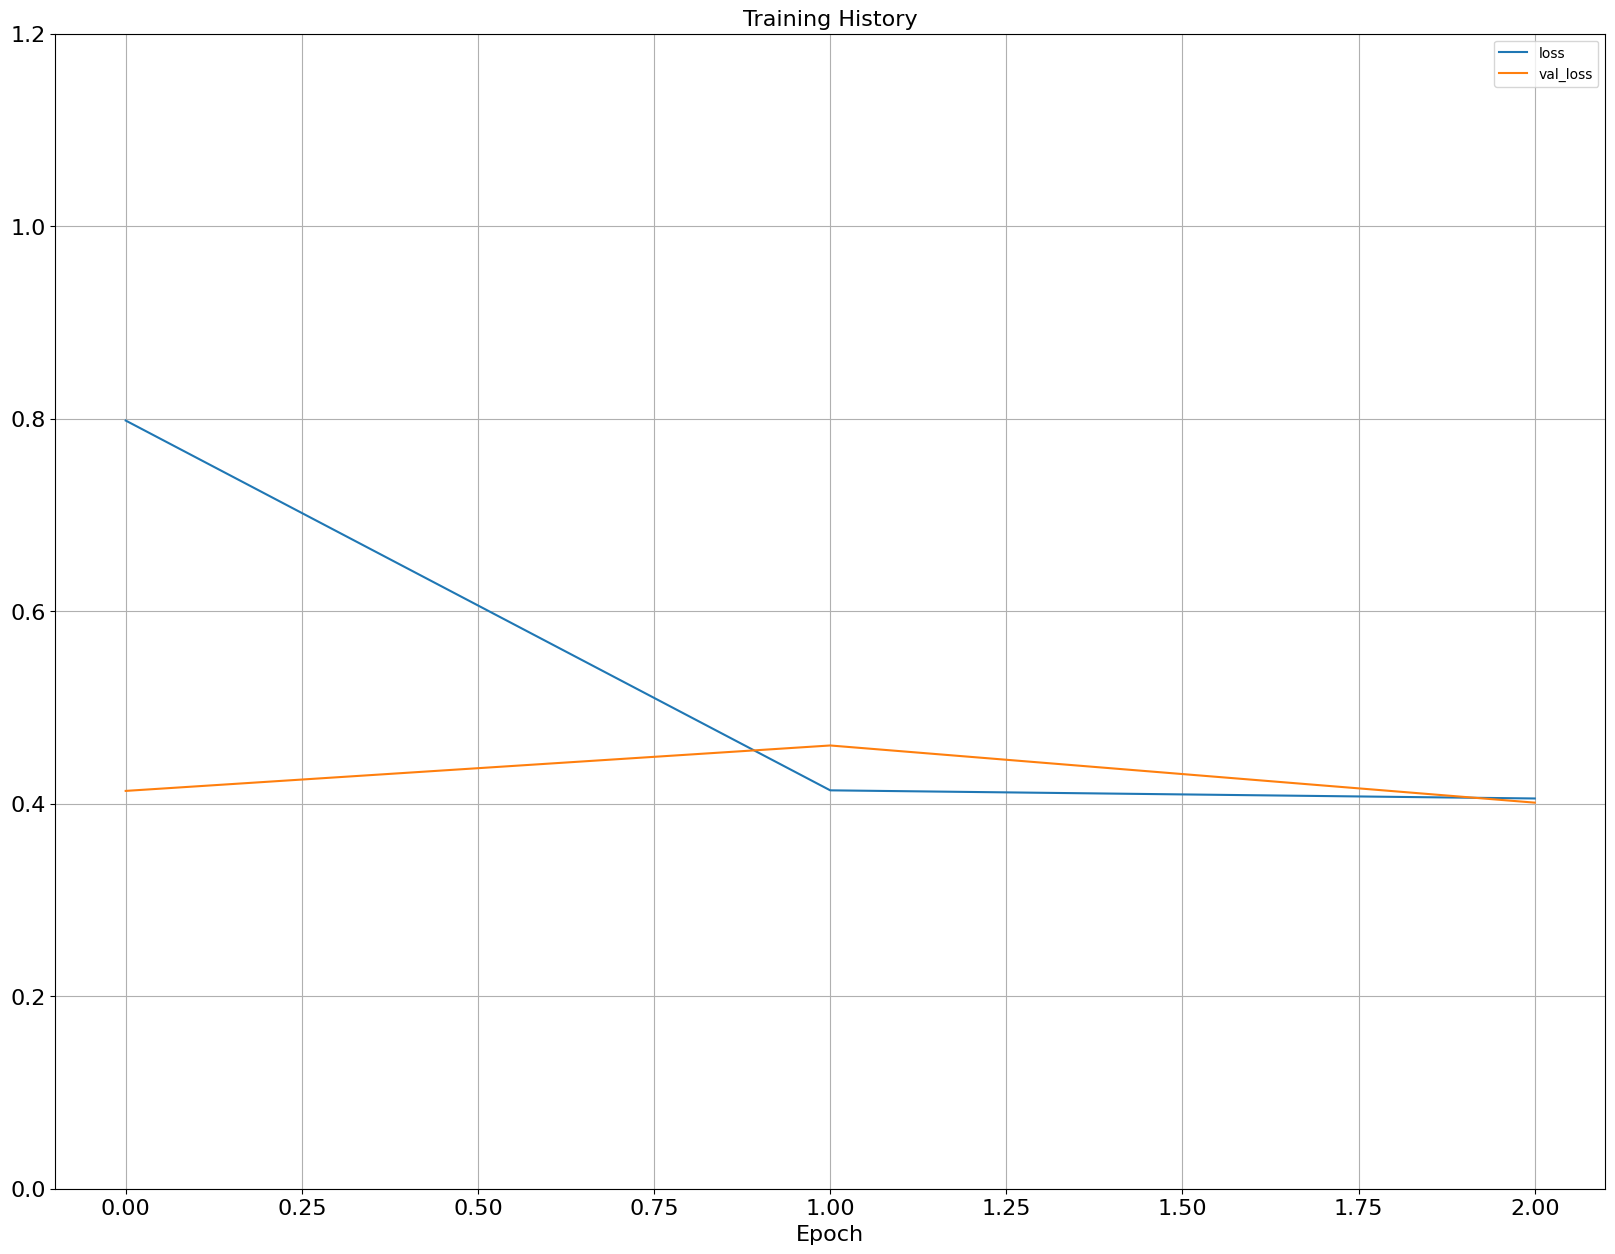

In [ ]:
# plot training history
pd.DataFrame(training_history.history).plot(figsize=(20, 15))
plt.grid(True)
plt.ylim(top=1.2)
plt.ylim(bottom=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Training History", fontsize=16)
plt.xlabel('Epoch', fontsize=16)
fname = local_save_folder_path+'/introduction_exercise_training_history.png'
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', transparent=False, bbox_inches=None, pad_inches=0.1)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# plot ROC with AUC
def plot_roc_curve_pp(fpr=[], tpr=[], labels=[], auc_tot=[], title=""):
    fname = title
    fig, ax = plt.subplots()
    ax.plot(fpr[0], tpr[0], label='Test '+str(round(auc_tot[0], 3)))
    ax.plot(fpr[1], tpr[1], label='Train '+str(round(auc_tot[1], 3)))
    ax.set_ylabel(r'TPR', fontsize=16)
    ax.set_xlabel('FPR', fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    legend = ax.legend(loc="lower right")
    legend.set_title("AUC", prop={'size': 14})
    plt.grid()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("ROC Curves", fontsize=16)
    plt.savefig(local_save_folder_path+'/'+fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', transparent=False, bbox_inches=None, pad_inches=0.1)
    plt.show()

In [ ]:
# Evaluate the model on the test and train data using the "predict" function.
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


In [ ]:
# Prepare the data for the ROC plots

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_predict_train)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

fpr_tot = [fpr, fpr_train]
tpr_tot = [tpr, tpr_train]

auc_test = roc_auc_score(y_test, y_predict_test)
auc_train = roc_auc_score(y_train, y_predict_train)
auc_tot = [auc_test, auc_train]

**6. Submit results to prepared Google Drive with a standardized filename**



In [ ]:
# File to save
file_name = 'module_1_evaluation_'+last_name+'_'+first_name+'_Brown_winter_school_'+date+'.png'

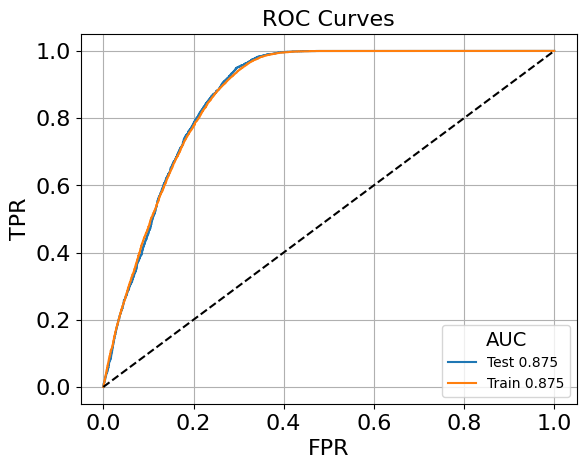

In [ ]:
# Plot and save ROC curve
labels = ["test", "train"]
plot_roc_curve_pp(fpr_tot, tpr_tot, labels, auc_tot, file_name)

In [ ]:
# List files in the save path to make sure files were saved properly
os.listdir(local_save_folder_path)

['my_model.png',
 'my_model_display.png',
 'introduction_exercise_training_history.png',
 'introduction_exercise_exercise_winter_school_2025.keras',
 'module_1_evaluation_LAST_FIRST_Brown_winter_school_YYYYMMDD.png']